In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from scipy.stats import chi2_contingency

In [2]:
# loading in dataset
df = pd.read_csv("/Users/cartermain/Downloads/mushroom.csv")

In [92]:
# getting familiar with dataset
print(df.head())

  cap-shape cap-surface cap-color bruises%3F  odor gill-attachment  \
0      b'x'        b's'      b'n'       b't'  b'p'            b'f'   
1      b'x'        b's'      b'y'       b't'  b'a'            b'f'   
2      b'b'        b's'      b'w'       b't'  b'l'            b'f'   
3      b'x'        b'y'      b'w'       b't'  b'p'            b'f'   
4      b'x'        b's'      b'g'       b'f'  b'n'            b'f'   

  gill-spacing gill-size gill-color stalk-shape  ...  \
0         b'c'      b'n'       b'k'        b'e'  ...   
1         b'c'      b'b'       b'k'        b'e'  ...   
2         b'c'      b'b'       b'n'        b'e'  ...   
3         b'c'      b'n'       b'n'        b'e'  ...   
4         b'w'      b'b'       b'k'        b't'  ...   

  stalk-color-above-ring_class stalk-color-below-ring_class veil-type_class  \
0                            7                            7               0   
1                            7                            7               0   
2    

First, we need to use label encoder to turn all of our object dtypes into integers to be able to run correlations 

In [8]:
# converting all objects into int classifications
le = preprocessing.LabelEncoder()
for feature in df.columns:
    df[feature + "_class"] = le.fit_transform(df[feature])

In [10]:
# creating df of integers
int_features = []
for feature in df.columns:
    if "_class" in feature:
        int_features.append(feature)

In [11]:
# collecting our integer features into a new dataset
df_int = df[int_features]

Now that we have our features as integers we can start looking at correlations

In [18]:
# finding the highest-correlation features with edibility
print(abs(df_int.corr()["class_class"]).sort_values(ascending = False))

class_class                       1.000000
gill-size_class                   0.540024
gill-color_class                  0.530566
bruises%3F_class                  0.501530
ring-type_class                   0.411771
stalk-root_class                  0.379361
gill-spacing_class                0.348387
stalk-surface-above-ring_class    0.334593
stalk-surface-below-ring_class    0.298801
population_class                  0.298686
habitat_class                     0.217179
ring-number_class                 0.214366
cap-surface_class                 0.178446
spore-print-color_class           0.171961
stalk-color-above-ring_class      0.154003
stalk-color-below-ring_class      0.146730
veil-color_class                  0.145142
gill-attachment_class             0.129200
stalk-shape_class                 0.102019
odor_class                        0.093552
cap-shape_class                   0.052951
cap-color_class                   0.031384
veil-type_class                        NaN
Name: class

Let's first look at how the edibility changes with gill size

In [29]:
print(round(df["class_class"].groupby(df["gill-size_class"]).mean(),2))

gill-size_class
0    0.30
1    0.89
Name: class_class, dtype: float64


This definitley appears to be a major difference with gill size 0 being a lot more likely to be edible than gill size 1. Let's confirm via chi-square test.

In [93]:
chi2, pval, dof, expected = chi2_contingency(pd.crosstab(df["class_class"], df["gill-size_class"]))
print(pval)
print("This is significant")

0.0
This is significant


Now let's check on gill color

In [95]:
print(round(df["class_class"].groupby(df["gill-color_class"]).mean(),2).sort_values(ascending = False))

gill-color_class
0     1.00
8     1.00
3     0.72
2     0.67
7     0.43
11    0.26
10    0.20
4     0.16
5     0.11
9     0.10
1     0.00
6     0.00
Name: class_class, dtype: float64


In [96]:
# let's find the names of the colors that are 100% and 0% poisonous
color_le = le.fit(df["gill-color"])
print("gill colors that are 100% poisonous")
print(color_le.classes_[0] + ", " + color_le.classes_[8])
print("")
print("gill colors that are 100% edible")
print(color_le.classes_[1] + ", " + color_le.classes_[6])

gill colors that are 100% poisonous
b'b', b'r'

gill colors that are 100% edible
b'e', b'o'


To establish significance, we'll have to use another chi-square test

In [38]:
chi2_2, pval_2, dof_2, expected_2 = chi2_contingency(pd.crosstab(df["class_class"], df["gill-color_class"]))

In [50]:
print(pval_2)
print("This is also significant")

0.0
This is also significant


Now let's look at how color impacts the odor of the mushroom

In [97]:
# first, let's find the correlation between the two
print(round(df_int.corr()["cap-color_class"]["odor_class"],2))

-0.39


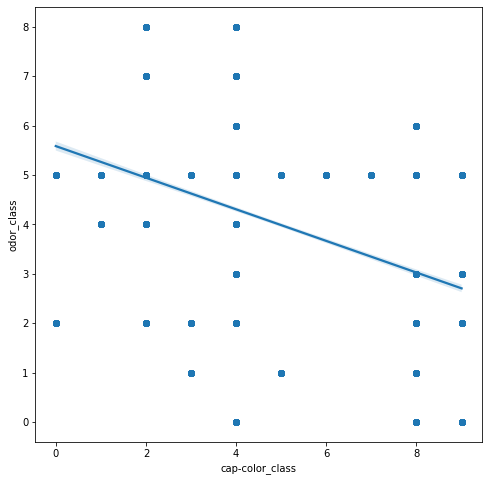

<Figure size 432x288 with 0 Axes>

In [100]:
# getting a visualization of correlation with best fit line
plt.figure(figsize = (8,8))
sns.regplot(x = df["cap-color_class"], y = df["odor_class"], data = df)
plt.show()
plt.clf()

In [102]:
# getting mean odor classification for each cap color 
for cap_color in sorted(df["cap-color_class"].unique()):
    print(str(cap_color) + ": " + str(round(df["odor_class"][df["cap-color_class"] == cap_color].mean(),2)))

0: 3.29
1: 4.73
2: 5.38
3: 3.65
4: 5.16
5: 3.22
6: 5.0
7: 5.0
8: 3.58
9: 1.88


In [105]:
# creating a crosstab with percentage makeup 
print(pd.crosstab(df["cap-color_class"], df["odor_class"], normalize = "index"))

odor_class              0         1         2         3         4         5  \
cap-color_class                                                               
0                0.000000  0.000000  0.571429  0.000000  0.000000  0.428571   
1                0.000000  0.000000  0.000000  0.000000  0.272727  0.727273   
2                0.000000  0.000000  0.192000  0.000000  0.008000  0.416000   
3                0.000000  0.034783  0.404348  0.000000  0.000000  0.560870   
4                0.021016  0.000000  0.126095  0.021016  0.005254  0.518389   
5                0.000000  0.444444  0.000000  0.000000  0.000000  0.555556   
6                0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
7                0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
8                0.146154  0.061538  0.092308  0.146154  0.000000  0.430769   
9                0.186567  0.000000  0.604478  0.186567  0.000000  0.022388   

odor_class              6         7         8  
cap

In [182]:
# finding odor le class translations
odor_le = le.fit(df["odor"])
odor_le_class = odor_le.classes_
print(odor_le_class)

["b'a'" "b'c'" "b'f'" "b'l'" "b'm'" "b'n'" "b'p'" "b's'" "b'y'"]


In [183]:
# finding cap color le class translations
cap_color_le = le.fit(df["cap-color"])
cap_color_le_class = cap_color_le.classes_
print(cap_color_le_class)

["b'b'" "b'c'" "b'e'" "b'g'" "b'n'" "b'p'" "b'r'" "b'u'" "b'w'" "b'y'"]


In [187]:
# finding which cap colors always smell like which odor
print(cap_color_le_class[6] + " (green cap) mushrooms always smells like " + odor_le_class[5] + " which is unscented.")
print(cap_color_le_class[7] + " (purple cap) mushrooms always smells like " + odor_le_class[5] + " which is unscented.")

b'r' (green cap) mushrooms always smells like b'n' which is unscented.
b'u' (purple cap) mushrooms always smells like b'n' which is unscented.
